In [1]:
import numpy as np
import matplotlib as mlp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import time

%matplotlib notebook

np.random.seed(10)

In [258]:
def func(v): # this is a blackbox function, mapping N^2 -> N
    
    
    return(math.pow(v[0], 2) + math.pow(v[1], 2)) # paraboloid

In [605]:
def monteCarlo(v, iter = 100):
    
    iter = int(iter)
    thres = (1+math.tanh(abs(np.abs(v))/1))/2
    rnd = np.random.rand(iter)
    
    samples = np.zeros(iter)
    samples[rnd<=thres] = 1
    samples[rnd>thres] = -1
    
    if(len(samples[samples == 1]) > len(samples[samples == -1])):
        return 1*v
    elif(len(samples[samples == 1]) < len(samples[samples == -1])):
        return -1*v
    else:
        return monteCarlo(v, iter)

We use the SPSA algorithm as defined by the iterative equation:

$
\sigma_{k+1} = \sigma_{k} + \alpha_{k}g_{k} 
$

where the gradient equation is definied as:

$$
g_{k} = \frac{f(\sigma_{k} + \beta_{k}\Delta_{k}) − f(\sigma_{k} - \beta_{k}\Delta_{k})}{2\beta_{k}}\Delta_{k}
$$

We control the convergence using these functions:

$$
\alpha_{k} = \frac{a}{(k + 1 + A)^S}
$$

$$
\beta_{k} = \frac{b}{(k + 1)^t}
$$

In [593]:
def spsa(x, delta, k, s = 0.602, t = 0.101):
    
    a = 1e-1
    b = 1e-1
    A_ = 0
    alpha_k = a/(k + 1 + A_)**s
    beta_k = b/(k + 1)**t
    
    #print("alpha_k: \t" + str(alpha_k))
    return(x + alpha_k*gradient(x, k, beta_k, delta))

In [546]:
def gradient(x, k, beta_k, delta_k, N = 1e2):
    #f1 = func(np.add(x, beta_k * delta_k))
    #f2 = func(np.add(x, (-1) * beta_k * delta_k))
    f1 = func(x + beta_k*delta_k)
    f2 = func(x - beta_k*delta_k)
    
    #return ((f1 - f2) / beta_k) * delta_k
    return(monteCarlo((f2 - f1) / beta_k) * delta_k)
    

In [547]:
gradient(np.array([0.002,0.003]), 7, 0.02, np.array([0.3, 0.5]))

array([ 0.00252,  0.0042 ])

In [606]:
x = np.array([2, -3])

path = np.array([np.append(x, func(x))])

for i in range(1000):
        #print()
        #print(x)
        delta = np.random.rand(2)*2 -1
        #print("delta:\t\t" + str(delta))
        x = spsa(x, delta, i, s=0, t=0)
        path = np.append(path, [np.append([x], [func(x)])], axis = 0)
print(x)
print(func(x))

[  2.72855381e-08   1.63311014e-09]
7.471676360601739e-16


<IPython.core.display.Javascript object>


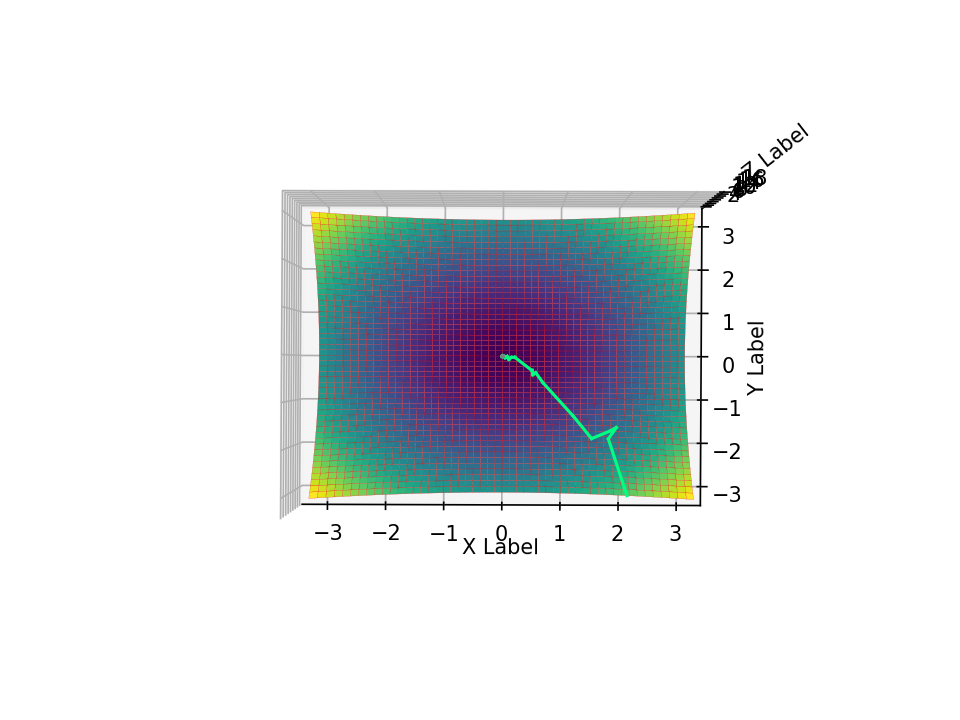

In [607]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')


x = y = np.arange(-3, 3, 0.02)
X, Y = np.meshgrid(x, y)
zs = np.array([func([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap = mlp.cm.viridis, edgecolors = 'r', linewidth = 0.1);

z = path[:,2]
x = path[:,0]
y = path[:,1]

for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color = [i/len(x), 1 - i/len(x), 0.5])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


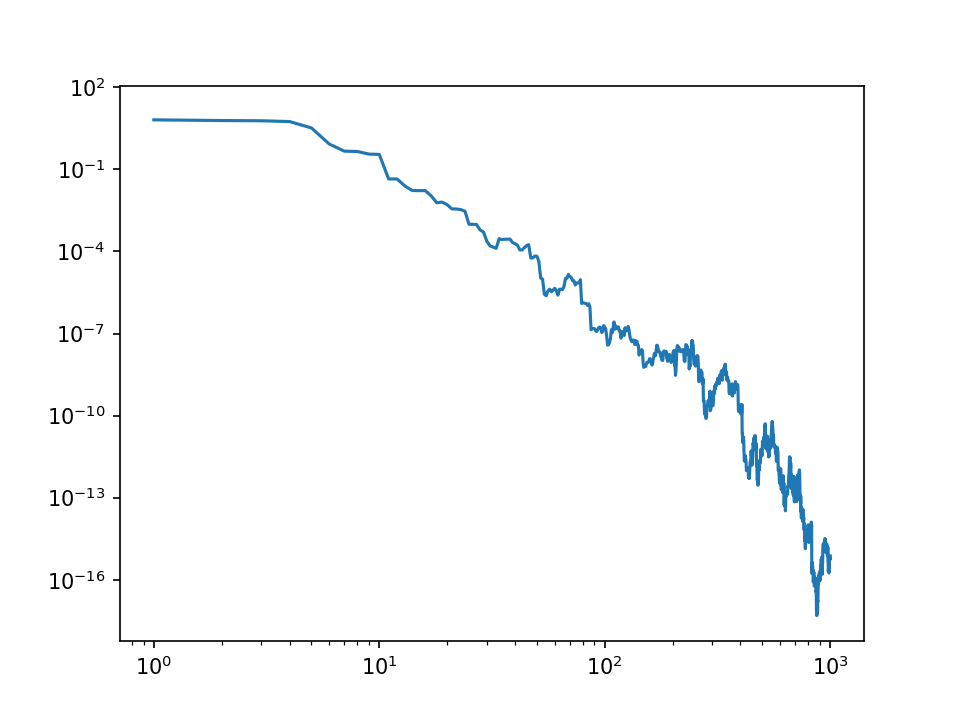

In [615]:
plt.figure()

plt.loglog(z)

<IPython.core.display.Javascript object>


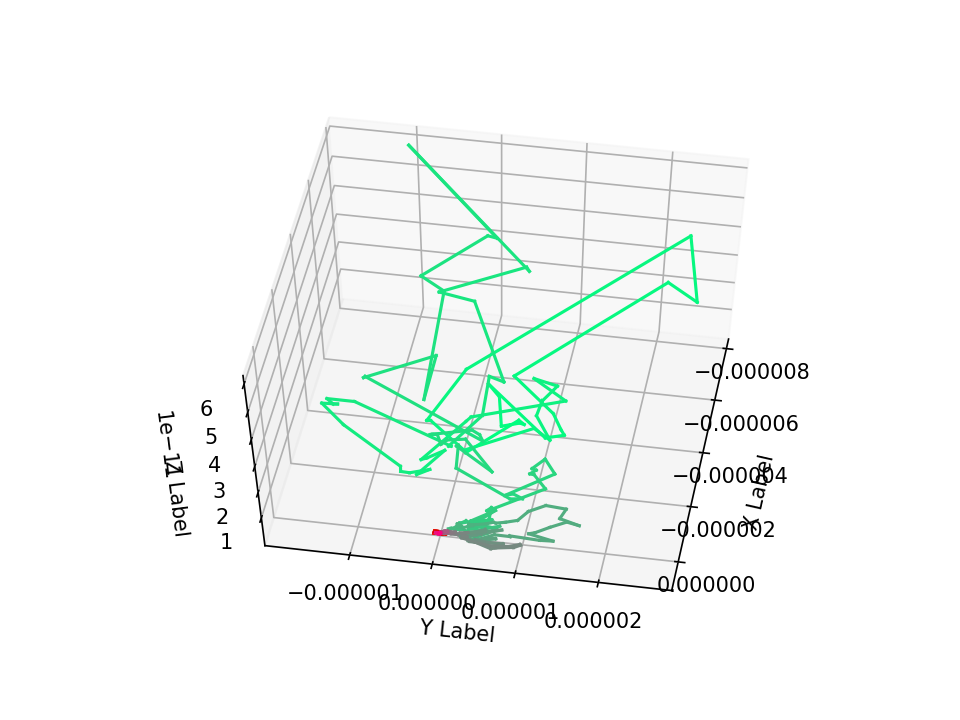

In [624]:
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')


rnge = max(path[500][0], path[500][1])

x = y = np.arange(-rnge, rnge, rnge/100)
X, Y = np.meshgrid(x, y)
zs = np.array([func([x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap = mlp.cm.viridis, edgecolors = 'r', linewidth = 0.1);

z = path[500:,2]
x = path[500:,0]
y = path[500:,1]

for i in range(len(x)-1):
    ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color = [i/len(x), 1 - i/len(x), 0.5])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


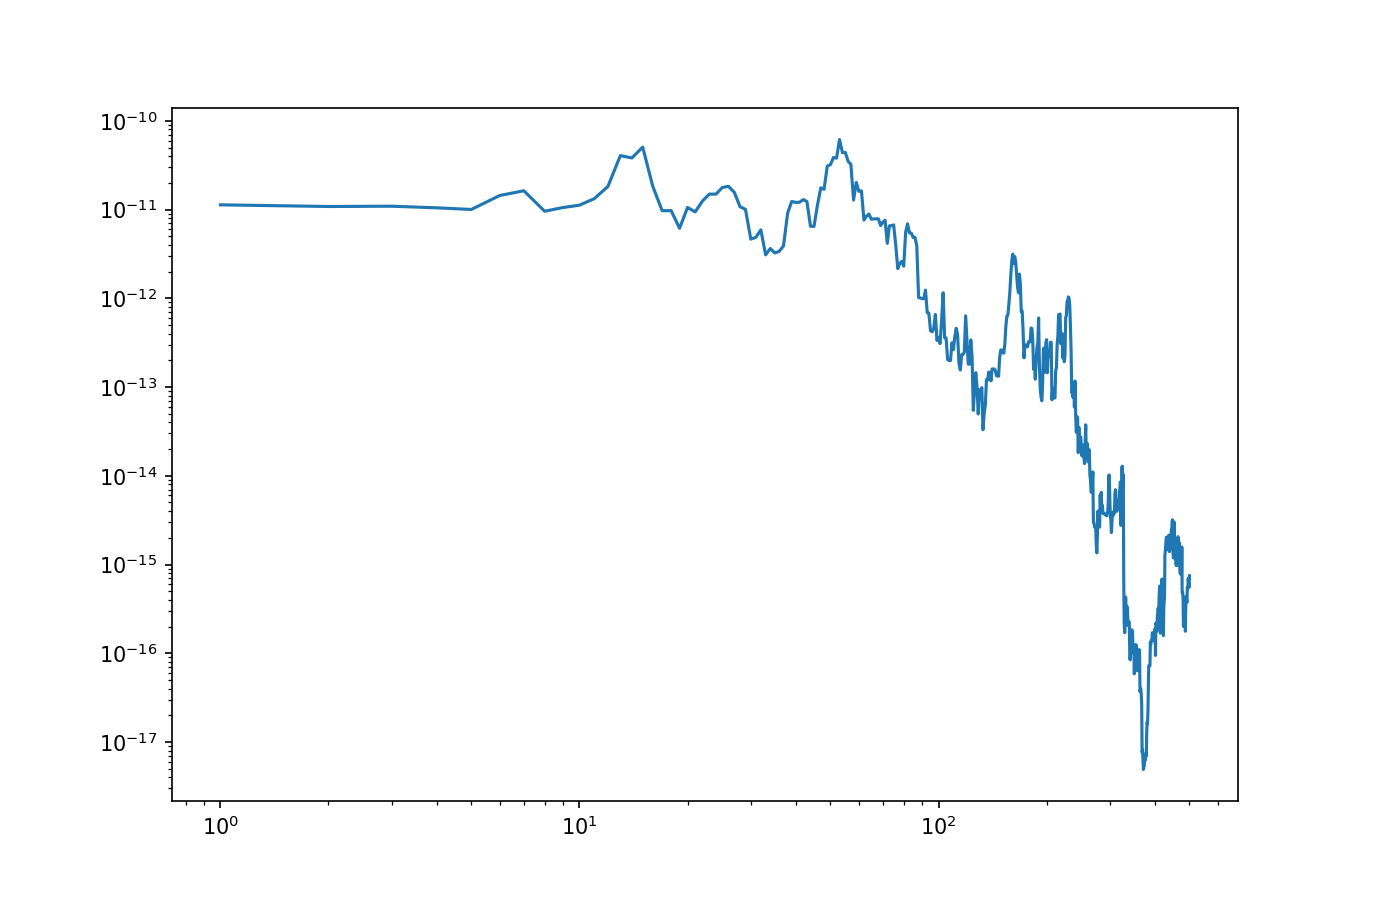

In [627]:
plt.figure()

plt.loglog(z)